You are expected to perform a simple classification problem - that of labelling emails as spam or non-spam, based on their content in terms of words. The dataset has been taken from UCI Machine learning repository (https://archive.ics.uci.edu/ml/datasets/Spambase). This must be achieved using two machine learning models based on Decision Trees.

In [19]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#import dataset
df = pd.read_csv("spambase.data")
df



,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [21]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  391


In [22]:
#droping all duplicates
df.drop_duplicates(inplace=True)

#droping all null values
df.dropna(how='all', inplace=True)

In [23]:
print("Number of rows after dropping duplicates: ", len(df))

Number of rows after dropping duplicates:  4209


In [24]:
y = df.iloc[:, -1] # last column as target variable
df= df.drop("1", axis="columns")
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


# PCA

In [25]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)


In [26]:
scaled_df=pd.DataFrame(data=scaled_data, columns= df.columns)

In [27]:
scaled_df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278
count,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,...,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03
mean,4.369805e-15,1.983380e-15,1.451599e-15,-1.379668e-16,-3.749964e-15,3.194113e-15,1.266633e-14,-3.066421e-15,-4.465713e-15,3.037696e-15,...,-1.912550e-15,4.391975e-15,-8.901303e-16,-9.937538e-16,-2.599937e-15,-4.821306e-15,7.586788e-17,-3.956109e-16,5.622993e-16,7.309166e-17
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479680e-01,-2.477619e-01,-5.650479e-01,-4.664991e-02,-4.729856e-01,-3.502513e-01,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-5.253738e-01,-1.643841e-01,-3.332409e-01,-3.173668e-01,-1.050837e-01,-1.322665e-01,-2.562244e-01,-4.690582e-01
25%,-3.479680e-01,-2.477619e-01,-5.650479e-01,-4.664991e-02,-4.729856e-01,-3.502513e-01,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-5.253738e-01,-1.643841e-01,-3.332409e-01,-3.173668e-01,-1.050837e-01,-1.133509e-01,-2.261615e-01,-4.060182e-01
50%,-3.479680e-01,-2.477619e-01,-5.650479e-01,-4.664991e-02,-4.729856e-01,-3.502513e-01,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-2.591909e-01,-1.643841e-01,-3.142675e-01,-3.173668e-01,-1.050837e-01,-9.313814e-02,-1.860778e-01,-3.074171e-01
75%,-3.479680e-01,-2.477619e-01,2.881769e-01,-4.664991e-02,1.231135e-01,-3.502513e-01,-2.957690e-01,-2.632980e-01,-3.256596e-01,-8.906033e-02,...,-1.164211e-01,-1.600299e-01,1.820165e-01,-1.643841e-01,5.927098e-02,-9.626226e-02,-1.050837e-01,-5.063097e-02,-4.077419e-02,-2.939455e-02
max,1.478534e+01,3.119301e+01,9.324604e+00,3.160616e+01,1.406601e+01,2.095207e+01,1.800369e+01,2.681583e+01,1.831755e+01,2.730852e+01,...,3.338210e+01,1.720410e+01,3.503375e+01,3.843384e+01,3.818036e+01,2.472585e+01,4.538220e+01,3.309814e+01,4.978834e+01,2.513488e+01


PCA component starting


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
new_data = pca.fit_transform(scaled_df)

In [29]:
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
                            , columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [30]:
principal_Df.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.293655,2.006890,0.067372,-0.490277,-0.106008
1,-1.612841,4.820755,3.146315,-1.007759,1.515679
2,-0.857355,0.414407,-0.549876,-0.075803,0.015838
3,-0.858208,0.413738,-0.551997,-0.075938,0.015869
4,-0.496912,-0.505909,-0.360520,0.448154,0.498573


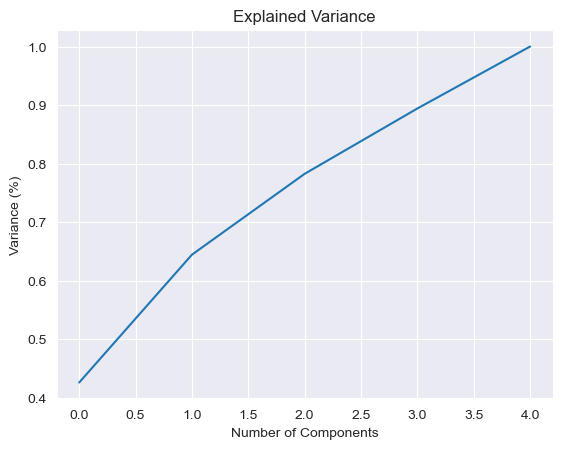

In [31]:
principalComponents = pca.fit_transform(principal_Df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [32]:
X = principal_Df.iloc[:, :-1] # all attributes except last one


# Doing train_test_split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Split the data considering the testing corpus as 30% and random state to 101.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [36]:
model.score(X_train, y_train)

0.8818737270875764

In [37]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Checking accuracy of testing dataset

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
predictions_test=model.predict(X_test)
print("DecisionTrees Test Accuracy: ",accuracy_score(y_test, predictions_test))

DecisionTrees Test Accuracy:  0.8677751385589866


# Checking accuracy of training dataset

In [40]:
predictions_train = model.predict(X_train)
print("DecisionTrees Train Accuracy: ", accuracy_score(y_train,predictions_train))

DecisionTrees Train Accuracy:  0.8818737270875764


# Visualizing final decision tree

In [41]:
from sklearn import tree
plt.figure(figsize=(100,100))
tree.plot_tree(model,filled=True)
plt.show()

# Evaluating dataset

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,predictions_test))


              precision    recall  f1-score   support

           0       0.86      0.93      0.89       758
           1       0.88      0.78      0.82       505

    accuracy                           0.87      1263
   macro avg       0.87      0.85      0.86      1263
weighted avg       0.87      0.87      0.87      1263



In [44]:
cm= confusion_matrix(y_test,predictions_test)
print(cm)

[[703  55]
 [112 393]]


Text(35.22222222222222, 0.5, 'Truth')

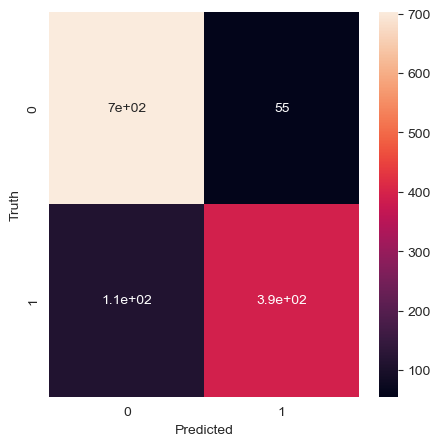

In [45]:
import seaborn as sn

plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [48]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, max_features=4, random_state=42)

In [49]:
bagging_clf.fit(X_train,y_train).score(X_test,y_test)

0.8915281076801267

In [50]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train).score(X_test,y_test)

0.8527315914489311